<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/Data_Manipulation_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Clone Business Analytics Repository**

In [1]:
!git clone https://github.com/pharringtonp19/business-analytics.git

Cloning into 'business-analytics'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 200 (delta 91), reused 76 (delta 22), pack-reused 0 (from 0)
Receiving objects: 100% (200/200), 5.32 MiB | 14.61 MiB/s, done.
Resolving deltas: 100% (91/91), done.


### **Import Libraries**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

### **Read In the Dataset**

In [10]:
df = pd.read_csv('/content/business-analytics/datasets/massachusetts_mortgages_2017.zip')

<ipython-input-10-3a3a8047f5cf>:1: DtypeWarning: Columns (34,36,38,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/business-analytics/datasets/massachusetts_mortgages_2017.zip')


### **Visualize the Dataset**

In [11]:
df.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,county_code,census_tract_number,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_name_1,applicant_race_1,applicant_race_name_2,applicant_race_2,applicant_race_name_3,applicant_race_3,applicant_race_name_4,applicant_race_4,applicant_race_name_5,applicant_race_5,co_applicant_race_name_1,co_applicant_race_1,co_applicant_race_name_2,co_applicant_race_2,co_applicant_race_name_3,co_applicant_race_3,co_applicant_race_name_4,co_applicant_race_4,co_applicant_race_name_5,co_applicant_race_5,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,applicant_income_000s,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,denial_reason_name_2,denial_reason_2,denial_reason_name_3,denial_reason_3,rate_spread,hoepa_status_name,hoepa_status,lien_status_name,lien_status,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,41-1795868,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,350,Preapproval was not requested,2,Loan originated,1,Boston - MA,14454.0,Massachusetts,MA,25,Plymouth County,23.0,5117.01,Not Hispanic or Latino,2,Hispanic or Latino,1,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,2,Male,1,64.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,4444.0,40.590000,94300.0,83.470001,1435.0,1724.0,NaN
1,2017,0000026336,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,550,Preapproval was not requested,2,Loan originated,1,"Cambridge, Newton, Framingham - MA",15764.0,Massachusetts,MA,25,Middlesex County,17.0,3746.00,Hispanic or Latino,1,Not Hispanic or Latino,2,American Indian or Alaska Native,1,White,5.0,NaN,NaN,NaN,NaN,NaN,NaN,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,Female,2,179.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,4755.0,27.440001,104800.0,133.389999,1352.0,1949.0,NaN
2,2017,0000024224,Office of the Comptroller of the Currency,OCC,1,VA-guaranteed,3,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,630,Not applicable,3,Loan originated,1,"Worcester - MA, CT",49340.0,Massachusetts,MA,25,Worcester County,27.0,7614.00,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",3,NaN,Other type of purchaser,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,6567.0,20.820000,84000.0,172.990005,1711.0,1883.0,NaN
3,2017,7197000003,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,298,Not applicable,3,Loan originated,1,"Worcester - MA, CT",49340.0,Massachusetts,MA,25,Worcester County,27.0,7502.00,"Information not provided by applicant in mail,...",3,No co-applicant,5,"I

### **Frequency Tables**

#### **Categorical (Nominal)**

Frequency Table for Loan Type

loan_type_name
Conventional          106962
FHA-insured            16295
VA-guaranteed           5867
FSA/RHS-guaranteed       767
Name: count, dtype: int64


Relative Frequency Table for Loan Type

loan_type_name
Conventional          0.823475
FHA-insured           0.125451
VA-guaranteed         0.045169
FSA/RHS-guaranteed    0.005905
Name: proportion, dtype: float64


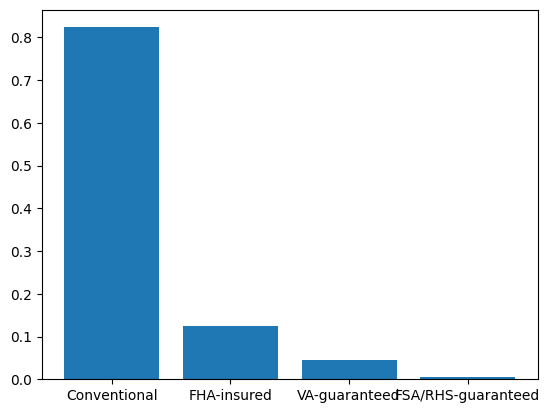

In [17]:
# Frequency
print("Frequency Table for Loan Type\n")
print(df['loan_type_name'].value_counts())
print("\n")

# Relative Frequency
print("Relative Frequency Table for Loan Type\n")
print(df['loan_type_name'].value_counts(normalize=True))

# Bar Plot
freq_table = df['loan_type_name'].value_counts(normalize=True)
plt.bar(freq_table.index, freq_table.values)
plt.show()

#### **Numerical**

#### **Histogram**

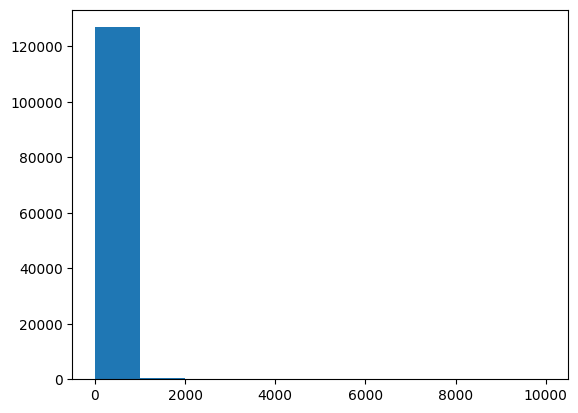

In [18]:
plt.hist(df['applicant_income_000s'])
plt.show()

We expect to see a range of values. Instead we see roughly one bar. What's going on here?

Let's explore this further. To do so, we can use the `describe` method to see summary statistics of the variable.

In [19]:
df['applicant_income_000s'].describe()

,applicant_income_000s
count,127313.000000
mean,131.637845
std,148.408773
min,1.000000
25%,69.000000
50%,101.000000
75%,152.000000
max,9999.000000


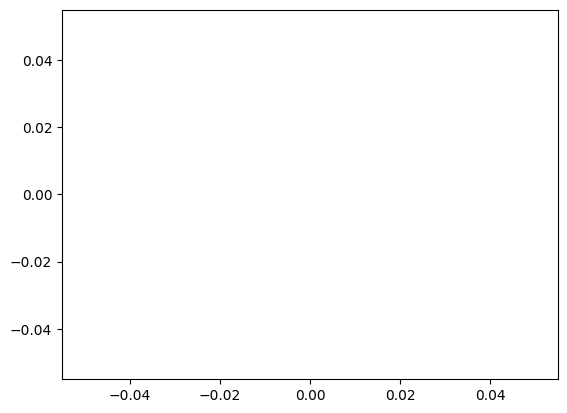

In [23]:
qs = np.linspace(0, 1, 100)
ys = np.quantile(df['applicant_income_000s'].values, qs)
plt.plot(qs, ys)
plt.show()